# 2 AutoGen - Simple agent

AutoGen is a framework that enables the development of LLM applications using multiple agents that can converse with each other to solve tasks. AutoGen agents are customizable, conversable, and seamlessly allow human participation. They can operate in various modes that employ combinations of LLMs, human inputs, and tools.

17/06/2024

<img src="https://raw.githubusercontent.com/retkowsky/images/master/autogenlogo.jpg">

> Documentation: https://microsoft.github.io/autogen/

In [1]:
import autogen
import openai
import os
import sys

from autogen import AssistantAgent, UserProxyAgent
from PIL import Image

In [2]:
sys.version

'3.10.11 (main, May 16 2023, 00:28:57) [GCC 11.2.0]'

In [3]:
def check_openai_version():
    """
    Check Azure Open AI version
    """
    installed_version = openai.__version__

    try:
        version_number = float(installed_version[:3])
    except ValueError:
        print("Invalid OpenAI version format")
        return

    print(f"Installed OpenAI version: {installed_version}")

    if version_number < 1.0:
        print("[Warning] You should upgrade OpenAI to have version >= 1.0.0")
        print("To upgrade, run: %pip install openai --upgrade")
    else:
        print(f"[OK] OpenAI version {installed_version} is >= 1.0.0")

In [4]:
check_openai_version()

Installed OpenAI version: 1.30.5
[OK] OpenAI version 1.30.5 is >= 1.0.0


In [5]:
config_list = autogen.config_list_from_json(
    "OAI_CONFIG_LIST",
    #filter_dict={"tags": ["gpt-4"]},  # comment out to get all
)
# When using a single openai endpoint, you can use the following:
# config_list = [{"model": "gpt-4", "api_key": os.getenv("OPENAI_API_KEY")}]

In [6]:
WORK_DIR = "workdir"

os.makedirs(WORK_DIR, exist_ok=True)

## 1. Agent

In [7]:
assistant = AssistantAgent(
    name="assistant",
    llm_config={
        "cache_seed": None,  # seed for caching and reproducibility
        "config_list": config_list,  # a list of OpenAI API configurations
        "temperature": 0.,  # temperature for sampling
    },
)

In [8]:
def is_termination_msg(data):
    has_content = "content" in data and data["content"] is not None
    return has_content and "TERMINATE" in data["content"]

In [9]:
user_proxy = UserProxyAgent(
    name="user_proxy",
    human_input_mode="NEVER",
    max_consecutive_auto_reply=10,
    is_termination_msg=is_termination_msg,
    code_execution_config={"work_dir": WORK_DIR},
)

In [10]:
assistant

In [11]:
user_proxy

## 2. Examples

In [12]:
user_proxy.initiate_chat(
    assistant,
    message=
    "What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE",
)

user_proxy (to assistant):

What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE

--------------------------------------------------------------------------------
assistant (to user_proxy):

First, let's get the current year using Python. 

```python
# python code
import datetime

current_year = datetime.datetime.now().year
print("The current year is:", current_year)
```

Next, we need to fetch the stock prices for MICROSOFT (MSFT) and SALESFORCE (CRM) at the beginning of the year and the current prices. We can use the `yfinance` library in Python to fetch this data. 

Please install the library if you haven't done so already. You can install it using pip:

```sh
pip install yfinance
```

After installing the library, you can use the following Python code to fetch the stock prices and calculate the year-to-date gain:

```python
# python code
import yfinance as yf

# Fetch the data
msft = yf.Ticker("MSFT")
crm = yf.Ticker("CRM")

# Get the historical mark


--------------------------------------------------------------------------------
assistant (to user_proxy):

I apologize for the confusion. The variable `current_year` was defined in a separate code block, and it seems like it was not recognized in the subsequent code block. Let's combine the two code blocks into one to avoid this issue.

```python
# python code
import datetime
import yfinance as yf

# Get the current year
current_year = datetime.datetime.now().year
print("The current year is:", current_year)

# Fetch the data
msft = yf.Ticker("MSFT")
crm = yf.Ticker("CRM")

# Get the historical market data
hist_msft = msft.history(start=f'{current_year}-01-01')
hist_crm = crm.history(start=f'{current_year}-01-01')

# Calculate the year-to-date gain
ytd_gain_msft = (hist_msft['Close'][-1] - hist_msft['Close'][0]) / hist_msft['Close'][0]
ytd_gain_crm = (hist_crm['Close'][-1] - hist_crm['Close'][0]) / hist_crm['Close'][0]

print("Year-to-date gain for MICROSOFT:", ytd_gain_msft)
print("

ChatResult(chat_id=None, chat_history=[{'content': 'What is the current year? Compare the year-to-date gain for MICROSOFT and SALESFORCE', 'role': 'assistant'}, {'content': 'First, let\'s get the current year using Python. \n\n```python\n# python code\nimport datetime\n\ncurrent_year = datetime.datetime.now().year\nprint("The current year is:", current_year)\n```\n\nNext, we need to fetch the stock prices for MICROSOFT (MSFT) and SALESFORCE (CRM) at the beginning of the year and the current prices. We can use the `yfinance` library in Python to fetch this data. \n\nPlease install the library if you haven\'t done so already. You can install it using pip:\n\n```sh\npip install yfinance\n```\n\nAfter installing the library, you can use the following Python code to fetch the stock prices and calculate the year-to-date gain:\n\n```python\n# python code\nimport yfinance as yf\n\n# Fetch the data\nmsft = yf.Ticker("MSFT")\ncrm = yf.Ticker("CRM")\n\n# Get the historical market data\nhist_msft 

### Another example

In [13]:
user_proxy.send(
    recipient=assistant,
    message=
    "Plot a chart of their price change YTD and save the plot into msft_salesforce.png.\
Choose the green color for Microsoft and blue for SalesForce.",
)

user_proxy (to assistant):

Plot a chart of their price change YTD and save the plot into msft_salesforce.png.Choose the green color for Microsoft and blue for SalesForce.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, we can use the matplotlib library in Python to plot the chart. If you haven't installed it yet, you can do so using pip:

```sh
pip install matplotlib
```

After installing the library, you can use the following Python code to plot the chart and save it:

```python
# python code
import matplotlib.pyplot as plt

# Plot the closing prices
plt.figure(figsize=(14,7))
plt.plot(hist_msft['Close'], color='green', label='Microsoft')
plt.plot(hist_crm['Close'], color='blue', label='SalesForce')

# Add labels and title
plt.title('Price Change YTD for Microsoft and SalesForce')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# Save the plot
plt.savefig('msft_salesforce.png')
```

This code plots the closing p

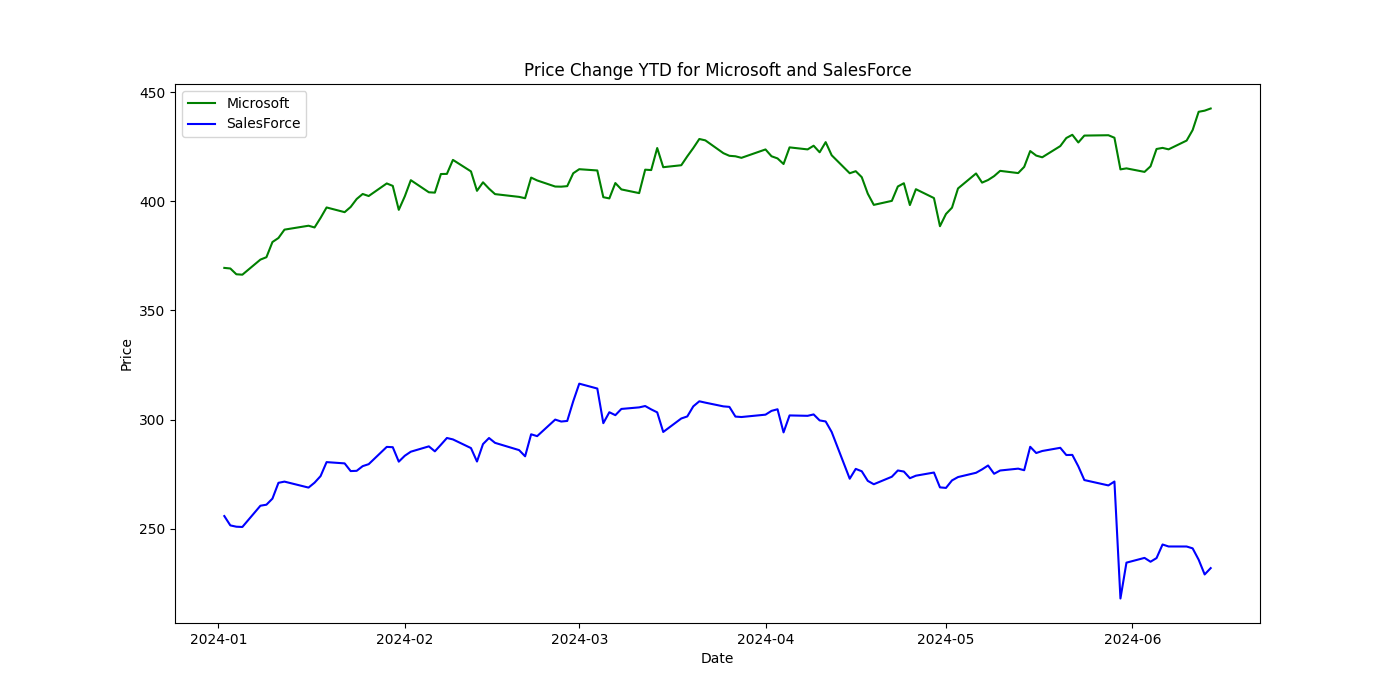

In [14]:
img = Image.open(os.path.join(WORK_DIR, 'msft_salesforce.png'))
img

In [15]:
!ls $WORK_DIR/*.* -lh

-rwxrwxrwx 1 root root 60K Jun 17 08:55 workdir/msft_salesforce.png


### Another example

In [16]:
user_proxy.send(
    recipient=assistant,
    message=
    "Add a 10 days moving average plot for these two time series and save it to msft_salesforce_ma.png. \
The moving average line for Microsoft should be in lime and the one for Salesforce should be in cyan color.",
)

user_proxy (to assistant):

Add a 10 days moving average plot for these two time series and save it to msft_salesforce_ma.png. The moving average line for Microsoft should be in lime and the one for Salesforce should be in cyan color.

--------------------------------------------------------------------------------
assistant (to user_proxy):

Sure, we can add a 10-day moving average to the plot. We can calculate the moving average using the `rolling` function in pandas, which provides rolling window calculations. Here is the Python code to do this:

```python
# python code
import datetime
import yfinance as yf
import matplotlib.pyplot as plt

# Get the current year
current_year = datetime.datetime.now().year
print("The current year is:", current_year)

# Fetch the data
msft = yf.Ticker("MSFT")
crm = yf.Ticker("CRM")

# Get the historical market data
hist_msft = msft.history(start=f'{current_year}-01-01')
hist_crm = crm.history(start=f'{current_year}-01-01')

# Calculate the 10-day movi

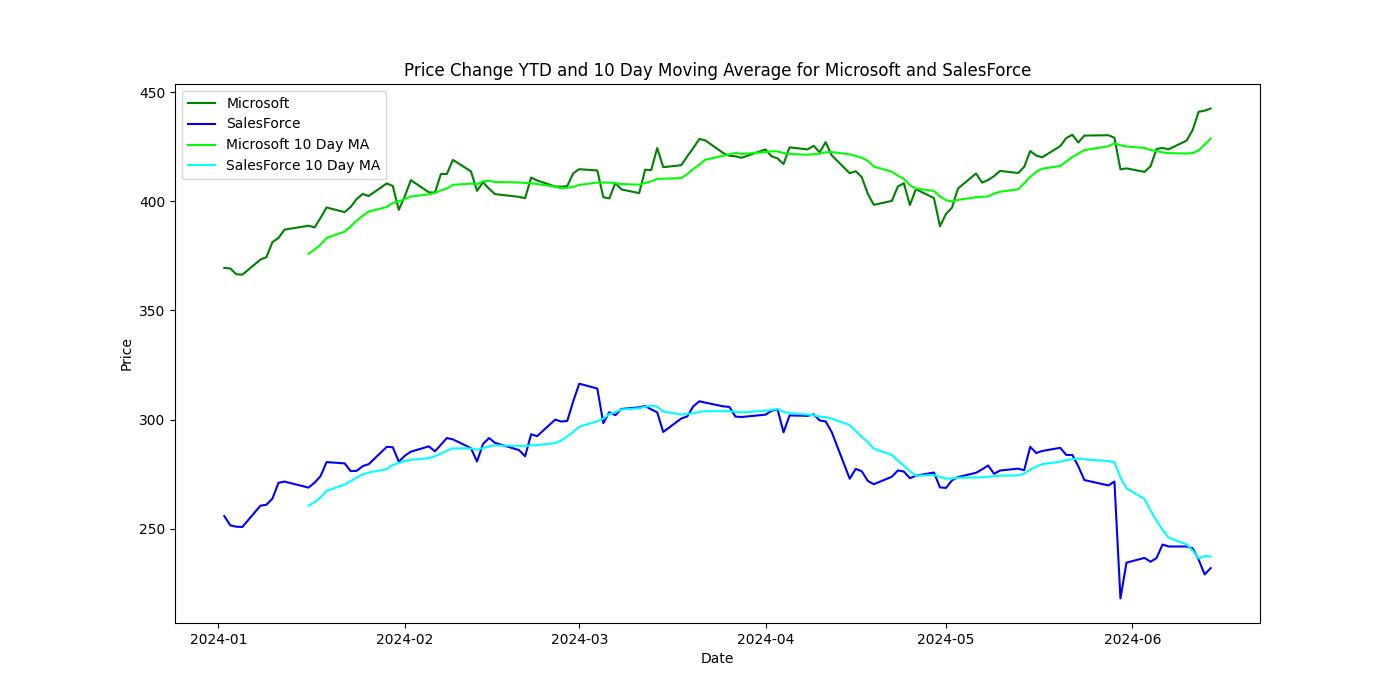

In [17]:
img = Image.open(os.path.join(WORK_DIR, 'msft_salesforce_ma.png'))
img

In [18]:
!ls $WORK_DIR/*.* -lh

-rwxrwxrwx 1 root root 60K Jun 17 08:55 workdir/msft_salesforce.png
-rwxrwxrwx 1 root root 81K Jun 17 08:55 workdir/msft_salesforce_ma.png
